# Box Muller and Polar Marsaglia method to generate samples from normal random variables

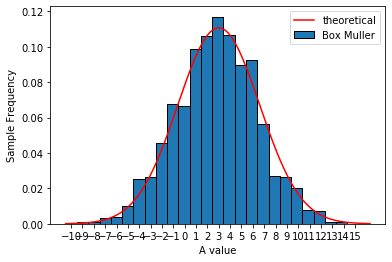

For Box Muller
covariance between x & y =  
 [[3.9626393  0.07971984]
 [0.07971984 8.70883109]]

sample mean =  2.8031118952260745
The theoretical mean of A is 3
sample variance =  12.830910068391903
The theoretical variance of A is 13

For Polar Marsaglia

covariance between x & y =  
 [[4.00047322e+00 2.83002442e-03]
 [2.83002442e-03 9.00016194e+00]]
sample mean =  2.999511119791296
sample variance =  13.006295201969726

X mean =  1.0004718801978925
The theoretical mean of X is 1

Y mean =  1.937859144491922
The theoretical mean of Y is 2

X variance =  4.00047321754279
The theoretical variance of X is 4.

Y variance =  9.000161935584227
The theoretical variance of Y is 9

box muller time =  7.98763108253479
polar marsaglia time =  16.27847456932068


In [1]:
#Box Muller and Polar Marsaglia method to generate samples from normal random variables

import time
import math
import numpy as np
import matplotlib.pyplot as plt

def boxmuller(n):
    a = []
    x = []
    y = []
    for i in range(n):
        u1, u2 = np.random.uniform(size=2)
        X = ((-2 * math.log(u1)) ** 0.5) * math.cos(2 * math.pi * u2)
        x.append(2 * X + 1)
        Y = ((-2 * math.log(u1)) ** 0.5) * math.sin(2 * math.pi * u2)
        y.append(3 * Y + 2)
        a.append(2 * X + 1 + 3 * Y + 2)
    return a, x, y

def marsaglia(n):
    a = []
    x = []
    y = []
    count = 0
    while count < n:
        u1, u2 = np.random.uniform(-1, 1, size=2)
        s = u1 ** 2 + u2 ** 2
        if s < 1:
            X = u1 * ((-2 * np.log(s) / s) ** 0.5)
            x.append(2 * X + 1)
            Y = u2 * ((-2 * np.log(s) / s) ** 0.5)
            y.append(3 * Y + 2)
            a.append(2 * X + 1 + 3 * Y + 2)
            count += 1
    return a, x, y

def theoretical(x):
    theoretical_pdf = []
    for i in x:
        theoretical_pdf.append(np.exp(-((i - 3) ** 2) / (2 * 13)) / ((13 ** 0.5) * np.sqrt(2 * np.pi)))
    return theoretical_pdf

a, x, y = boxmuller(1000)
theoretical_pdf = theoretical(np.arange(min(a)-1, max(a)+2, 0.05))
plt.figure()
plt.hist(a, bins=math.ceil(max(a) - min(a)), edgecolor='black', label='Box Muller', density = 1)
plt.plot(np.arange(min(a) - 1, max(a) + 2, 0.05), theoretical_pdf, color='r', label='theoretical')
plt.xticks(range(int(min(a)) - 1, int(max(a)) + 2))
plt.xlabel('A value')
plt.ylabel('Sample Frequency')
plt.legend()
plt.show()
print('For Box Muller')
print('covariance between x & y =  \n', np.cov(np.vstack((x,y))))
print('\nsample mean = ', np.mean(a))
print('The theoretical mean of A is 3')
print('sample variance = ', np.var(a, ddof=1))
print('The theoretical variance of A is 13')

A, X, Y = marsaglia(1000000)
print('\nFor Polar Marsaglia')
print('\ncovariance between x & y =  \n', np.cov(np.vstack((X,Y))))
print('sample mean = ', np.mean(A))
print('sample variance = ', np.var(A, ddof=1))
print('\nX mean = ', np.mean(X))
print('The theoretical mean of X is 1')
print('\nY mean = ', np.mean(y))
print('The theoretical mean of Y is 2')
print('\nX variance = ', np.var(X, ddof=1))
print('The theoretical variance of X is 4.')
print('\nY variance = ', np.var(Y, ddof=1))
print('The theoretical variance of Y is 9')

boxmuller_start = time.time()
boxmuller(1000000)
boxmuller_end = time.time()
print('\nbox muller time = ', boxmuller_end - boxmuller_start)
marsaglia_start = time.time()
marsaglia(1000000)
marsaglia_end = time.time()
print('polar marsaglia time = ', marsaglia_end - marsaglia_start)